In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM solana''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Solana,SOL,2020-04-11 23:59:59,1.049073,0.765020,0.951054,0.776819,4.386244e+07,0.0
1,2,Solana,SOL,2020-04-12 23:59:59,0.956670,0.762426,0.785448,0.882507,3.873690e+07,0.0
2,3,Solana,SOL,2020-04-13 23:59:59,0.891603,0.773976,0.890760,0.777832,1.821129e+07,0.0
3,4,Solana,SOL,2020-04-14 23:59:59,0.796472,0.628169,0.777832,0.661925,1.674761e+07,0.0
4,5,Solana,SOL,2020-04-15 23:59:59,0.704964,0.621531,0.669289,0.646651,1.307528e+07,0.0


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        452 non-null    object 
 1   Symbol      452 non-null    object 
 2   Date        452 non-null    object 
 3   High        452 non-null    float64
 4   Low         452 non-null    float64
 5   Open        452 non-null    float64
 6   Close       452 non-null    float64
 7   Volume      452 non-null    float64
 8   Marketcap   452 non-null    float64
 9   Range       452 non-null    float64
 10  Difference  452 non-null    float64
dtypes: float64(8), object(3)
memory usage: 39.0+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        452 non-null    object        
 1   Symbol      452 non-null    object        
 2   Date        452 non-null    datetime64[ns]
 3   High        452 non-null    float64       
 4   Low         452 non-null    float64       
 5   Open        452 non-null    float64       
 6   Close       452 non-null    float64       
 7   Volume      452 non-null    float64       
 8   Marketcap   452 non-null    float64       
 9   Range       452 non-null    float64       
 10  Difference  452 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 39.0+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,452.000000,452.000000,452.000000,452.000000,4.520000e+02,4.520000e+02,452.000000,452.000000
mean,11.190482,9.647555,10.400225,10.471388,1.956751e+08,2.588164e+09,1.542927,0.071164
std,15.148788,13.006301,14.082328,14.114444,3.906998e+08,3.985932e+09,2.749351,1.826989
min,0.559759,0.505194,0.513391,0.515273,6.520201e+05,0.000000e+00,0.020491,-20.982073
25%,1.484753,1.311024,1.410480,1.424761,7.851473e+06,3.056948e+07,0.131354,-0.114904
50%,3.018518,2.483870,2.867550,2.881389,1.858893e+07,1.042625e+08,0.397257,0.009377
75%,15.270240,13.774265,14.262057,14.362851,1.802343e+08,3.811371e+09,1.712573,0.203108
max,58.302927,46.187557,56.089257,55.910960,2.772225e+09,1.524342e+10,28.095912,9.699702


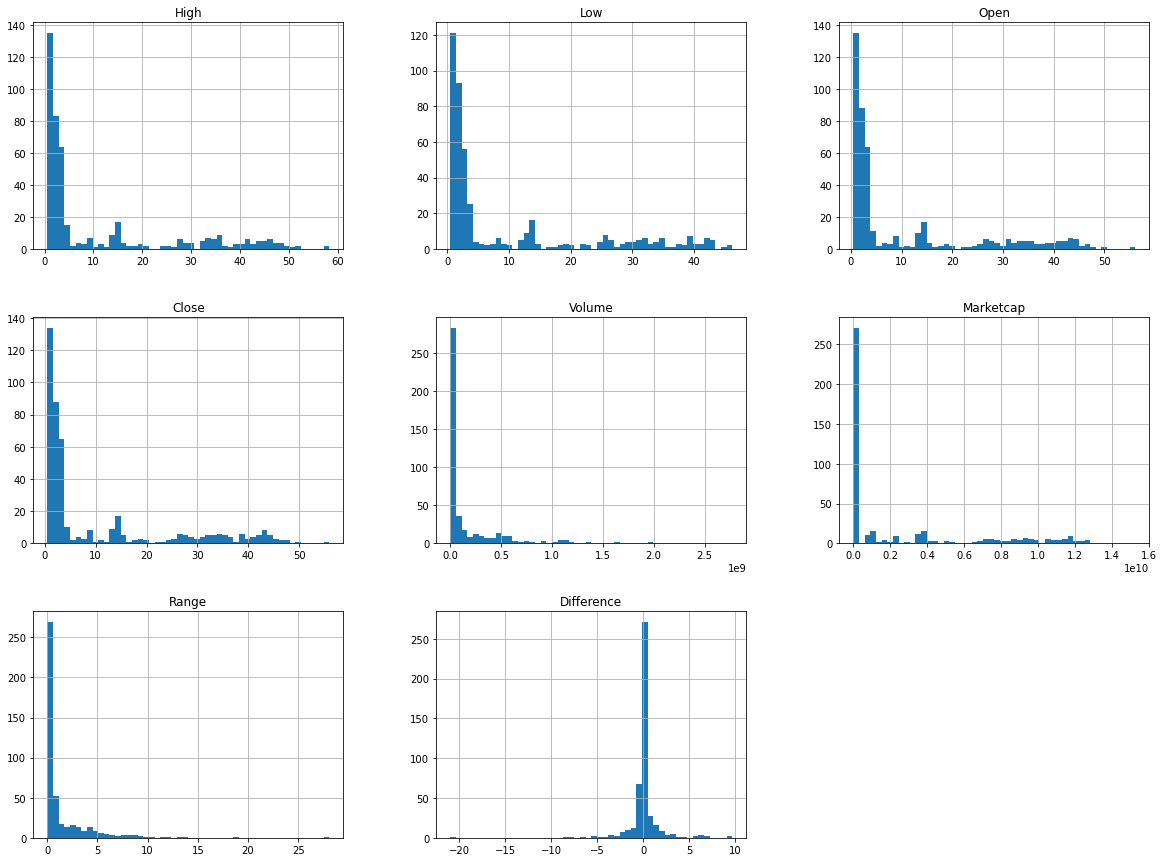

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,403,436,406,407,405,426,412,422,380,320
Date,2021-05-19 23:59:59,2021-06-21 23:59:59,2021-05-22 23:59:59,2021-05-23 23:59:59,2021-05-21 23:59:59,2021-06-11 23:59:59,2021-05-28 23:59:59,2021-06-07 23:59:59,2021-04-26 23:59:59,2021-02-25 23:59:59
Difference,-20.982073,-8.604035,-7.672796,-6.537019,-5.634401,-5.064068,-4.636248,-3.991346,-3.56534,-3.414169


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,404,402,372,408,385,379,376,410,418,415
Date,2021-05-20 23:59:59,2021-05-18 23:59:59,2021-04-18 23:59:59,2021-05-24 23:59:59,2021-05-01 23:59:59,2021-04-25 23:59:59,2021-04-22 23:59:59,2021-05-26 23:59:59,2021-06-03 23:59:59,2021-05-31 23:59:59
Difference,9.699702,9.250543,7.167417,6.785251,6.614684,6.522156,6.196329,5.491825,5.452191,4.212004


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

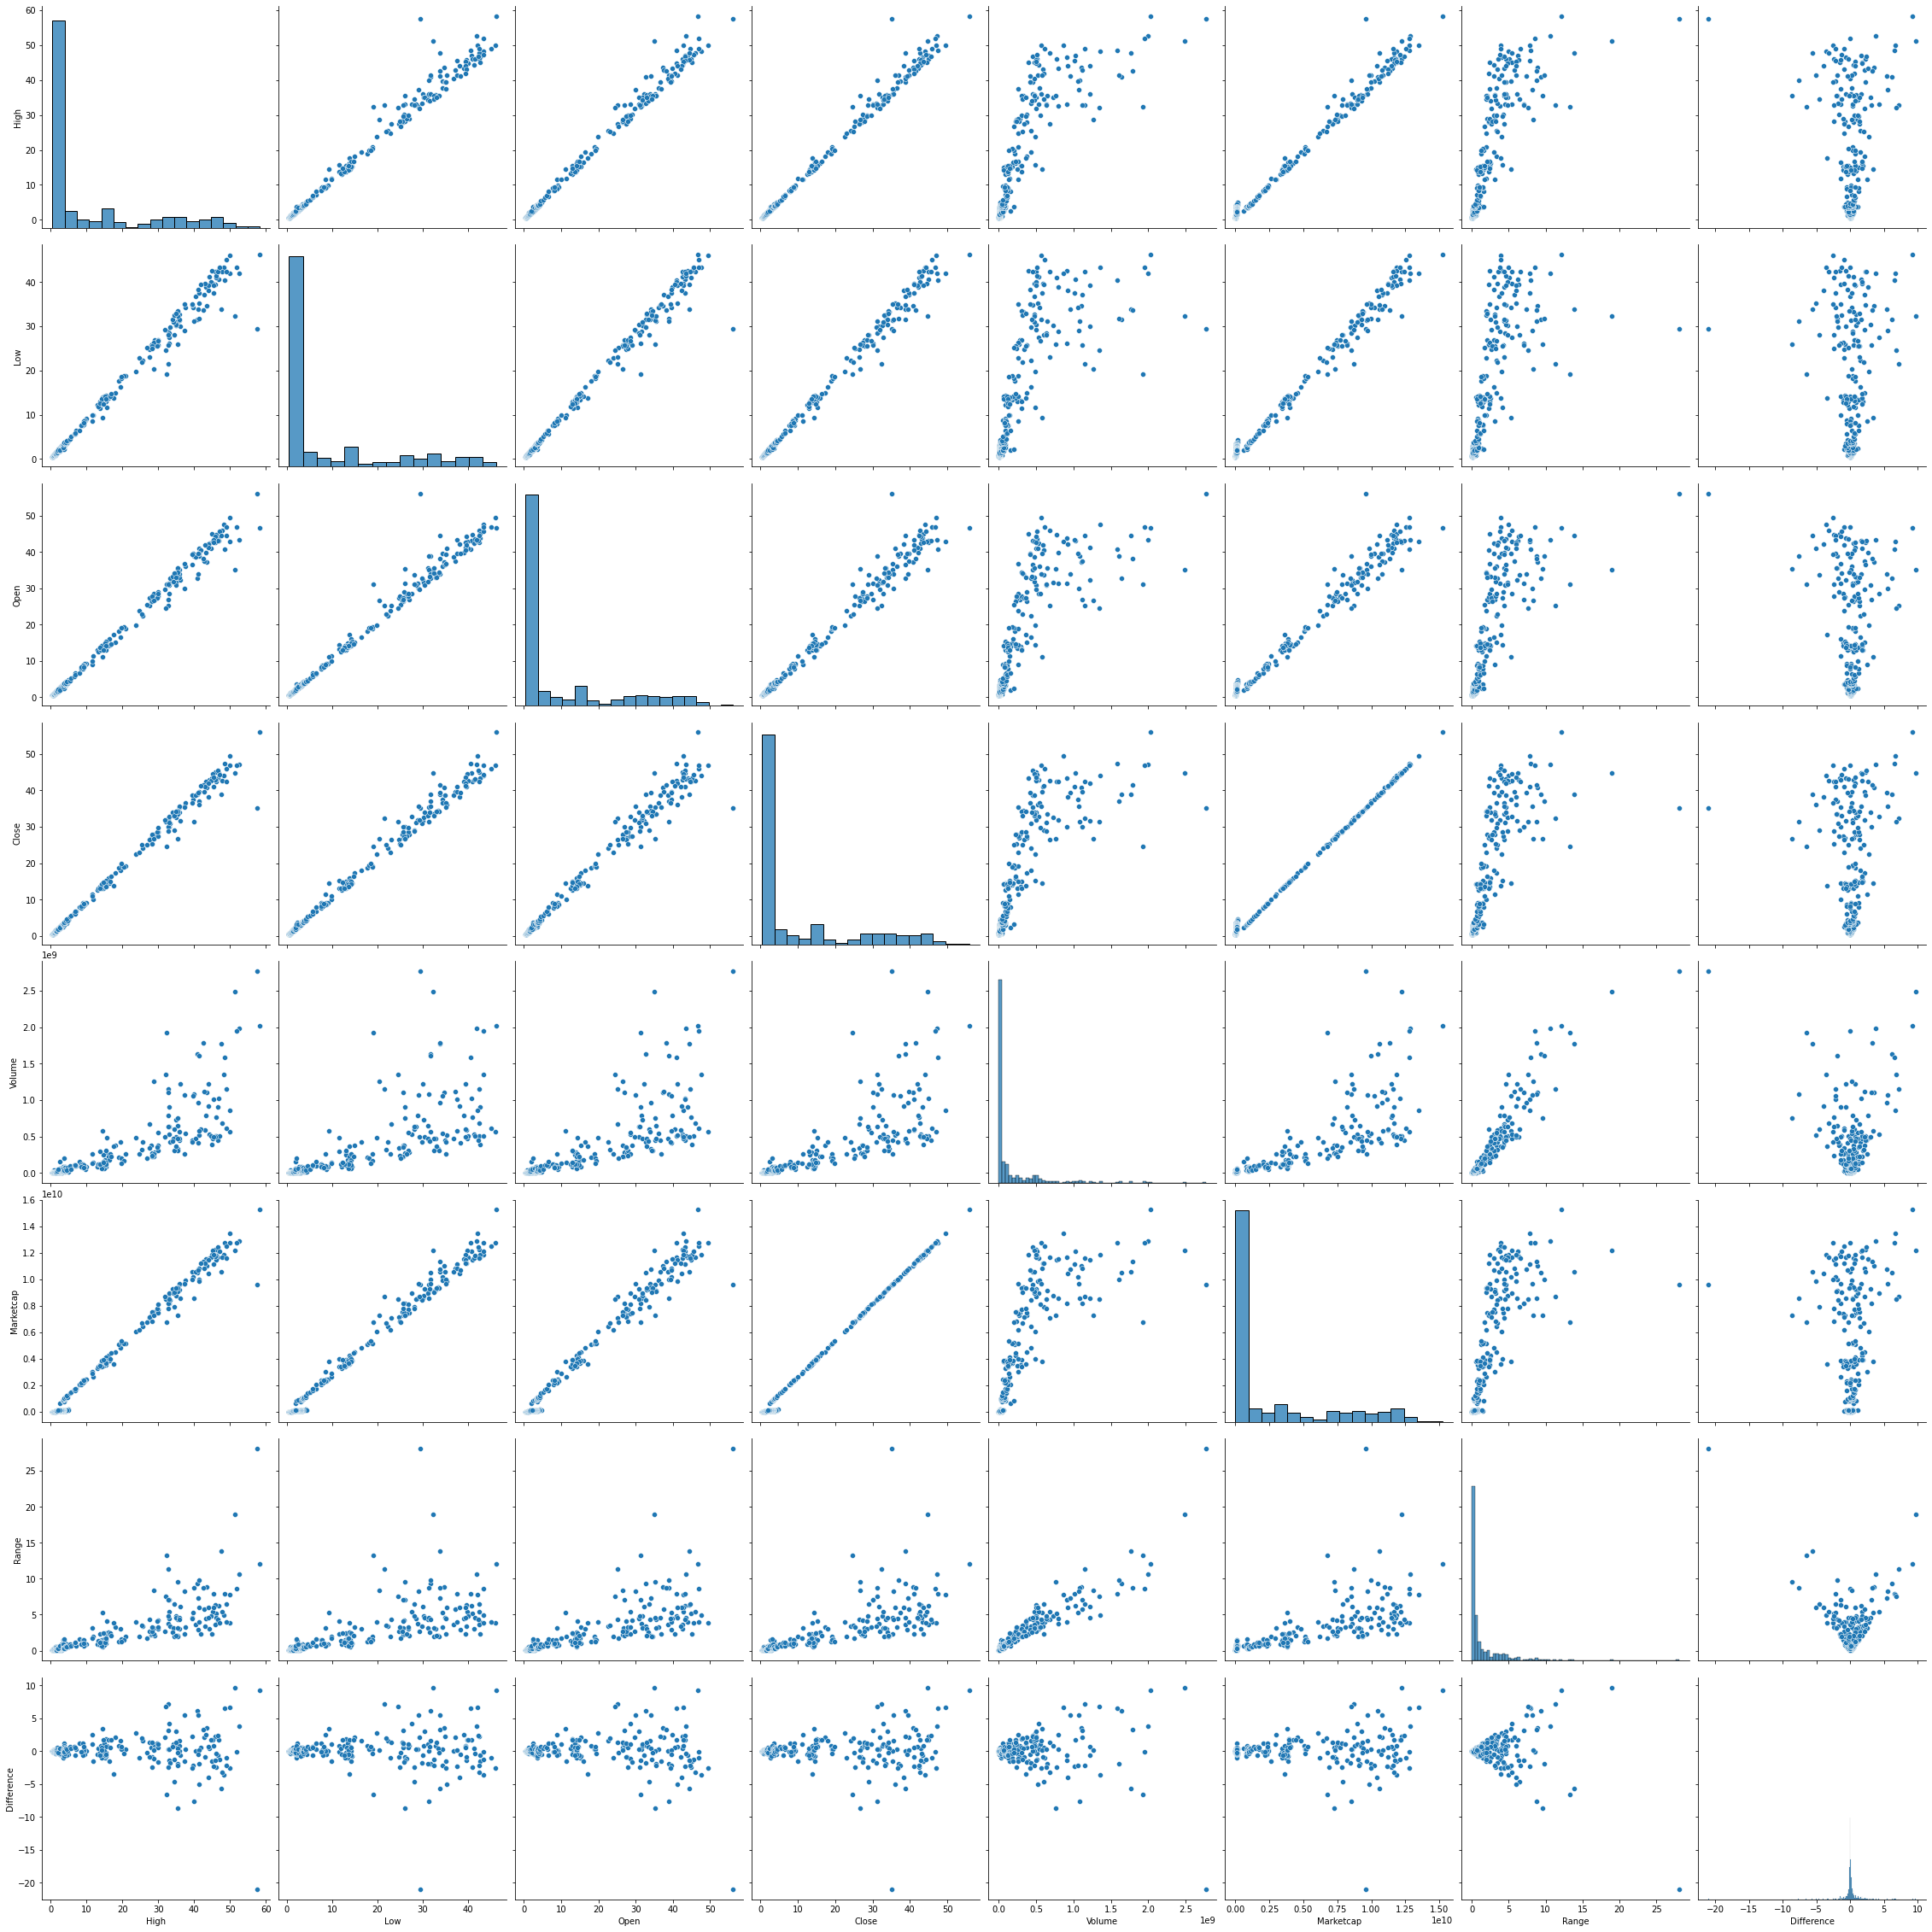

In [15]:
sns.pairplot(data,height=4);
